# Optimization in DL

Optimization in deep learning is necessary to achieve high accuracy and efficient model execution. For this task, there are some algorithms that are responsible for adjusting the parameters of neural networks in order to minimize the loss function. These algorithms affect not only the speed and quality of training, but also how well the model performs with new data. Many optimization algorithms have their own unique characteristics and methods for solving learning problems. Here we will look at some of the most important and widely used algorithms such as Stochastic Gradient Descent, Momentum, RMSprop, Adam and others.

def plot_results(results):
    optimizers = list(results.keys())
    losses = [results[opt][0] for opt in optimizers]
    accuracies = [results[opt][1] for opt in optimizers]

    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel('Optimizer')
    ax1.set_ylabel('Loss', color=color)
    ax1.bar(optimizers, losses, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Accuracy', color=color)
    ax2.plot(optimizers, accuracies, color=color, marker='o')
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title('Comparison of Different Optimizers')
    plt.show()

## **Stochastic gradient descent (SGD)**
---

Theory:
Stochastic gradient descent (SGD) is one of the main and simplest optimization algorithms in machine learning and deep learning. SGD uses the principle of gradient descent to minimize the loss function. This is achieved by sequentially updating the model's weight in the direction opposite to the gradient of the loss function. SGD updates weights using the gradient computed from one or more training examples, as opposed to classical gradient descent, which computes the gradient on each data set. This makes SGD more efficient and faster, especially when dealing with big data. However, the stochastic nature of the algorithm can lead to increased fluctuations during the training process, making it difficult to achieve an accurate minimum of the loss function in some cases. Decreasing the learning rate over time and applying momentum are techniques that are often used to improve the convergence and robustness of the learning process in SGD. SGD is used in a wide range of deep learning tasks, despite its simplicity.

Simple implementation of SGD


```
def gradient_descent(gradient, start, learn_rate, n_iter):
    vector = start
    for _ in range(n_iter):
        diff = -learn_rate * gradient(vector)
        vector += diff
    return vector
```
gradient_descent() takes four arguments:


1. Gradient is the function or any Python callable object that takes a vector and returns the gradient of the function you’re trying to minimize
2. Start is the point where the algorithm starts its search, given as a sequence (tuple, list, NumPy array, and so on) or scalar (in the case of a one-dimensional problem).
3. learn_rate is the learning rate that controls the magnitude of the vector update.
4. n_iter is the number of iterations.

Before you apply gradient_descent(), you can add another termination criterion:

```
import numpy as np

def gradient_descent(
    gradient, start, learn_rate, n_iter=50, tolerance=1e-06
):
    vector = start
    for _ in range(n_iter):
        diff = -learn_rate * gradient(vector)
        if np.all(np.abs(diff) <= tolerance):
            break
        vector += diff
    return vector
```
You now have the additional parameter tolerance (line 4), which specifies the minimal allowed movement in each iteration. You’ve also defined the default values for tolerance and n_iter, so you don’t have to specify them each time you call gradient_descent().

Lines 9 and 10 enable gradient_descent() to stop iterating and return the result before n_iter is reached if the vector update in the current iteration is less than or equal to tolerance. This often happens near the minimum, where gradients are usually very small. Unfortunately, it can also happen near a local minimum or a saddle point.

Line 9 uses the convenient NumPy functions numpy.all() and numpy.abs() to compare the absolute values of diff and tolerance in a single statement. That’s why you import numpy on line 1.

Now that you have the first version of gradient_descent(), it’s time to test your function. You’ll start with a small example and find the minimum of the function $𝐶 = 𝑣²$.

This function has only one independent variable ($𝑣$), and its gradient is the derivative 2$𝑣$. It’s a differentiable convex function, and the analytical way to find its minimum is straightforward. However, in practice, analytical differentiation can be difficult or even impossible and is often approximated with numerical methods.

You need only one statement to test your gradient descent implementation:

```
>>> gradient_descent(
...     gradient=lambda v: 2 * v, start=10.0, learn_rate=0.2
... )
2.210739197207331e-06
```
You use the lambda function lambda v: 2 * v to provide the gradient of $𝑣²$. You start from the value 10.0 and set the learning rate to 0.2. You get a result that’s very close to zero, which is the correct minimum.

The figure below shows the movement of the solution through the iterations:
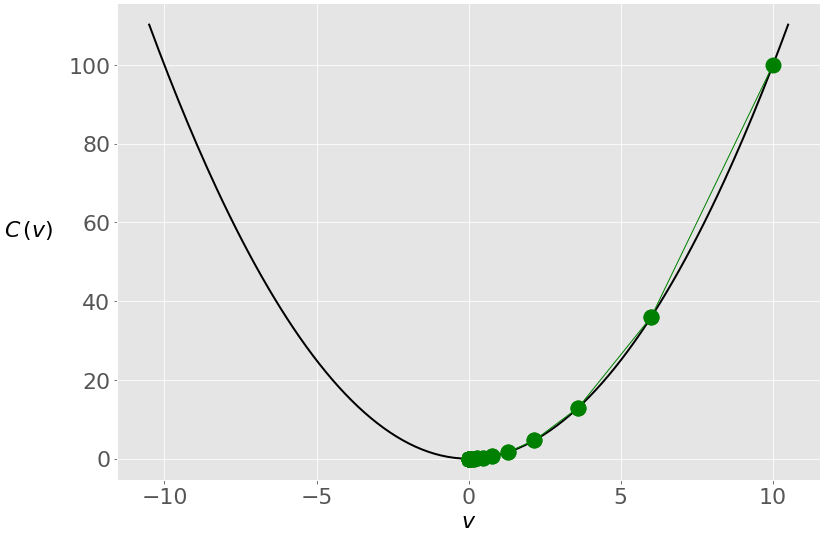


Stochastic gradient descent (SGD) in contrast performs a parameter update for each training example xⁱ and label yⁱ:

$ \theta=\theta-\eta\cdot\nabla_\theta J\left( \theta;x^{(i)};y^{(i)} \right) $



In [ ]:
import json
import ipywidgets as widgets
from IPython.display import display, clear_output

# Загрузка данных теста из JSON файла
with open('Stochastic1.json', 'r') as f:
    data = json.load(f)

def create_test(questions):
    for i, question in enumerate(questions):
        print(f"Question {i+1}. {question['question']}\n")

        # Создание кнопок для вариантов ответов
        for key, option in question['options'].items():
            button = widgets.Button(
                description=option,
                layout=widgets.Layout(width='100%', height='auto', overflow='hidden')
            )
            button.style.button_color = 'lightgray'
            button.on_click(lambda b, ans=key, q=question: on_button_click(b, ans, q['answer']))
            display(button)

        print("\n")

def on_button_click(button, chosen_answer, correct_answer):
    if chosen_answer == correct_answer:
        button.style.button_color = 'lightgreen'
        print("Correct!")
    else:
        button.style.button_color = 'red'
        print("Incorrect!")

# Вызов функции для создания теста
create_test(data['questions'])


Question 1. What is the main purpose of stochastic gradient descent (SGD) in machine learning and deep learning?



Button(description='Maximizing the loss function', layout=Layout(height='auto', overflow='hidden', width='100%…

Button(description='Reducing the learning rate', layout=Layout(height='auto', overflow='hidden', width='100%')…

Button(description='Minimizing the loss function', layout=Layout(height='auto', overflow='hidden', width='100%…

Button(description='Increasing the efficiency of model training', layout=Layout(height='auto', overflow='hidde…

In [ ]:
import json
import ipywidgets as widgets
from IPython.display import display, clear_output

# Загрузка данных теста из JSON файла
with open('Stochastic2.json', 'r') as f:
    data = json.load(f)

def create_test(questions):
    for i, question in enumerate(questions):
        print(f"Question {i+1}. {question['question']}\n")

        # Создание кнопок для вариантов ответов
        for key, option in question['options'].items():
            button = widgets.Button(
                description=option,
                layout=widgets.Layout(width='100%', height='auto', overflow='hidden')
            )
            button.style.button_color = 'lightgray'
            button.on_click(lambda b, ans=key, q=question: on_button_click(b, ans, q['answer']))
            display(button)

        print("\n")

def on_button_click(button, chosen_answer, correct_answer):
    if chosen_answer == correct_answer:
        button.style.button_color = 'lightgreen'
        print("Correct!")
    else:
        button.style.button_color = 'red'
        print("Incorrect!")

# Вызов функции для создания теста
create_test(data['questions'])


Question 1. What is the key difference between stochastic gradient descent (SGD) and classical gradient descent?



Button(description='SGD calculates the gradient on each data set', layout=Layout(height='auto', overflow='hidd…

Button(description='SGD updates the weights using the gradient computed from one or more training examples', l…

Button(description='SGD always uses less training data', layout=Layout(height='auto', overflow='hidden', width…

Button(description='SGD is slower than classical gradient descent', layout=Layout(height='auto', overflow='hid…



Incorrect!
Correct!
Incorrect!
Incorrect!


In [ ]:
import json
import ipywidgets as widgets
from IPython.display import display, clear_output

# Загрузка данных теста из JSON файла
with open('Stochastic3.json', 'r') as f:
    data = json.load(f)

def create_test(questions):
    for i, question in enumerate(questions):
        print(f"Question {i+1}. {question['question']}\n")

        # Создание кнопок для вариантов ответов
        for key, option in question['options'].items():
            button = widgets.Button(
                description=option,
                layout=widgets.Layout(width='100%', height='auto', overflow='hidden')
            )
            button.style.button_color = 'lightgray'
            button.on_click(lambda b, ans=key, q=question: on_button_click(b, ans, q['answer']))
            display(button)

        print("\n")

def on_button_click(button, chosen_answer, correct_answer):
    if chosen_answer == correct_answer:
        button.style.button_color = 'lightgreen'
        print("Correct!")
    else:
        button.style.button_color = 'red'
        print("Incorrect!")

# Вызов функции для создания теста
create_test(data['questions'])


Question 1. What techniques are often used to improve the convergence and robustness of the learning process in SGD?



Button(description='Increase in learning rate over time', layout=Layout(height='auto', overflow='hidden', widt…

Button(description='Application of stochasticity', layout=Layout(height='auto', overflow='hidden', width='100%…

Button(description='Reducing the learning rate over time and applying momentum', layout=Layout(height='auto', …

Button(description='Using more training examples for each update', layout=Layout(height='auto', overflow='hidd…

## Nesterov
---
Nesterov Accelerated Gradient (NAG) takes Stochastic Gradient Descent (SGD) optimization to the next level by utilizing the accumulated gradient in a more effective way. Unlike standard momentum, which simply takes a large step in the direction of the accumulated gradient, NAG takes a peek into where the parameters would be after the step, calculates the gradient at that point, and then makes a more informed update. This results in quicker convergence and improved overall performance. In simpler terms, NAG starts with the current momentum and takes a big leap in that direction, calculates the gradient at the new position, and then makes a correction based on this updated information. This approach is similar to "looking ahead" and adjusting accordingly.

The update formula for NAG is as follows:

1. Speed update:

$$v_{t+1} = \mu \cdot v_t - \eta \cdot \nabla_{\theta} J(\theta - \mu \cdot v_t)$$

Where:

$v_t$ — speed at step t,
$\mu$ is the torque coefficient,
$\eta$ — learning rate,
$\nabla_{\theta} J(\theta - \mu \cdot v_t)$ is the gradient loss function J over the parameters $\theta$, calculated in the structure predicted by the subsequent velocity.

2. Updating parameters:

$$\theta_{t+1} = \theta_t + v_{t+1}$$

Where:

$\theta_t$ — model parameters at step t.

In [ ]:
import json
import ipywidgets as widgets
from IPython.display import display, clear_output

# Загрузка данных теста из JSON файла
with open('Nesterov1.json', 'r') as f:
    data = json.load(f)

def create_test(questions):
    for i, question in enumerate(questions):
        print(f"Question {i+1}. {question['question']}\n")

        # Создание кнопок для вариантов ответов
        for key, option in question['options'].items():
            button = widgets.Button(
                description=option,
                layout=widgets.Layout(width='100%', height='auto', overflow='hidden')
            )
            button.style.button_color = 'lightgray'
            button.on_click(lambda b, ans=key, q=question: on_button_click(b, ans, q['answer']))
            display(button)

        print("\n")

def on_button_click(button, chosen_answer, correct_answer):
    if chosen_answer == correct_answer:
        button.style.button_color = 'lightgreen'
        print("Correct!")
    else:
        button.style.button_color = 'red'
        print("Incorrect!")

# Вызов функции для создания теста
create_test(data['questions'])


Question 1. How does Nesterov Accelerated Gradient (NAG) differ from standard momentum in SGD optimization?



Button(description='NAG uses a smaller step size than standard momentum.', layout=Layout(height='auto', overfl…

Button(description='NAG takes a leap in the direction opposite to the accumulated gradient.', layout=Layout(he…

Button(description='NAG calculates the gradient at the future parameter position and makes an informed update.…

Button(description='NAG ignores the accumulated gradient for making updates.', layout=Layout(height='auto', ov…



Incorrect!
Incorrect!
Correct!
Incorrect!


In [ ]:
import json
import ipywidgets as widgets
from IPython.display import display, clear_output

# Загрузка данных теста из JSON файла
with open('Nesterov2.json', 'r') as f:
    data = json.load(f)

def create_test(questions):
    for i, question in enumerate(questions):
        print(f"Question {i+1}. {question['question']}\n")

        # Создание кнопок для вариантов ответов
        for key, option in question['options'].items():
            button = widgets.Button(
                description=option,
                layout=widgets.Layout(width='100%', height='auto', overflow='hidden')
            )
            button.style.button_color = 'lightgray'
            button.on_click(lambda b, ans=key, q=question: on_button_click(b, ans, q['answer']))
            display(button)

        print("\n")

def on_button_click(button, chosen_answer, correct_answer):
    if chosen_answer == correct_answer:
        button.style.button_color = 'lightgreen'
        print("Correct!")
    else:
        button.style.button_color = 'red'
        print("Incorrect!")

# Вызов функции для создания теста
create_test(data['questions'])


Question 1. What is the result of Nesterov Accelerated Gradient's approach to optimization?



Button(description='Slower convergence and degraded performance.', layout=Layout(height='auto', overflow='hidd…

Button(description='Quicker convergence and improved overall performance.', layout=Layout(height='auto', overf…

Button(description='No significant change in convergence speed.', layout=Layout(height='auto', overflow='hidde…

Button(description='More frequent oscillations in parameter updates.', layout=Layout(height='auto', overflow='…



Incorrect!
Correct!
Incorrect!
Incorrect!


In [ ]:
import json
import ipywidgets as widgets
from IPython.display import display, clear_output

# Загрузка данных теста из JSON файла
with open('Nesterov3.json', 'r') as f:
    data = json.load(f)

def create_test(questions):
    for i, question in enumerate(questions):
        print(f"Question {i+1}. {question['question']}\n")

        # Создание кнопок для вариантов ответов
        for key, option in question['options'].items():
            button = widgets.Button(
                description=option,
                layout=widgets.Layout(width='100%', height='auto', overflow='hidden')
            )
            button.style.button_color = 'lightgray'
            button.on_click(lambda b, ans=key, q=question: on_button_click(b, ans, q['answer']))
            display(button)

        print("\n")

def on_button_click(button, chosen_answer, correct_answer):
    if chosen_answer == correct_answer:
        button.style.button_color = 'lightgreen'
        print("Correct!")
    else:
        button.style.button_color = 'red'
        print("Incorrect!")

# Вызов функции для создания теста
create_test(data['questions'])


Question 1. What does the NAG method do before making a parameter update?



Button(description='It recalculates the previous gradients.', layout=Layout(height='auto', overflow='hidden', …

Button(description='It starts with the current momentum and makes a correction based on updated gradient infor…

Button(description='It reduces the learning rate for a more conservative update.', layout=Layout(height='auto'…

Button(description='It doubles the accumulated gradient to ensure a larger step.', layout=Layout(height='auto'…



Incorrect!
Correct!


## Adagrad
---
Adagrad is an algorithm for gradient-based optimization that does just this: It adapts the learning rate to the parameters, performing smaller updates
(i.e. low learning rates) for parameters associated with frequently occurring features, and larger updates (i.e. high learning rates) for parameters associated with infrequent features. For this reason, it is well-suited for dealing with sparse data. have found that Adagrad greatly improved the robustness of SGD and used it for training large-scale neural nets at Google, which -- among other things -- learned to recognize cats in Youtube videos. Moreover, used Adagrad to train GloVe word embeddings, as infrequent words require much larger updates than frequent ones.

Previously, we performed an update for all parameters θ at once as every parameter $\theta_i$ used the same learning rate $η$ Adagrad uses a different learning rate for every parameter $θ_i$ at every time step $t$ we first show Adagrad's per-parameter update, which we then vectorize. For brevity, we use $g_t$ to denote the gradient at time step $t$. $g_{t,i}$
is then the partial derivative of the objective function w.r.t. to the parameter $\theta_i$ at time step $t$:

$g_{t,i}=\nabla_\theta J(\theta_{t,i})$

The SGD update for every parameter $\theta_i$ at each time step $t$ then becomes:

$\theta_{t+1,i}=\theta_{t,i}−\eta\cdot g_{t,i}$

In its update rule, Adagrad modifies the general learning rate $\eta$ at each time step $t$ for every parameter $\theta_i$ based on the past gradients that have been computed for $\theta_i$:

$\theta_{t+1,i}=\theta_{t,i}−\frac{\eta}{\sqrt{G_{t,ii}+ϵ}}⋅g_{t,i}$

$G_t$ $∈$ $ℝ^{d×d}$ here is a diagonal matrix where each diagonal element $i$, $i$ is the sum of the squares of the gradients w.r.t. $\theta_i$ up to time step $t$, while $ϵ$ is a smoothing term that avoids division by zero (usually on the order of 1$e$−8). Interestingly, without the square root operation, the algorithm performs much worse. As $G_t$ contains the sum of the squares of the past gradients w.r.t. to all parameters $\theta$ along its diagonal, we can now vectorize our implementation by performing a matrix-vector product $⊙$ between
$G_t$ and $g_t$:

$\theta_{t+1}=\theta_t−\frac{\eta}{\sqrt{G_t+\epsilon}}\odot g_t$

Adagrad's main weakness is its accumulation of the squared gradients in the denominator: Since every added term is positive, the accumulated sum keeps growing during training. This in turn causes the learning rate to shrink and eventually become infinitesimally small, at which point the algorithm is no longer able to acquire additional knowledge.



Optimizer: SGD, Loss: 0.0796, Accuracy: 0.9753
Optimizer: SGD, Loss: 0.0751, Accuracy: 0.9760


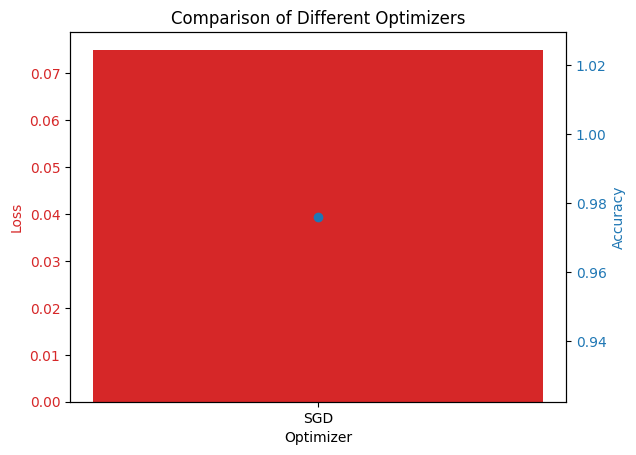

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam, Adadelta, Nadam
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

def train_evaluate(optimizer):
    model = create_model()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=5, verbose=0)
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    return loss, accuracy


results = {}
for opt in [tf.keras.optimizers.SGD(momentum=0.9), tf.keras.optimizers.SGD(momentum=0.9, nesterov=True)]:
    loss, accuracy = train_evaluate(opt)
    results[opt.__class__.__name__] = (loss, accuracy)
    print(f'Optimizer: {opt.__class__.__name__}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')
plot_results(results)

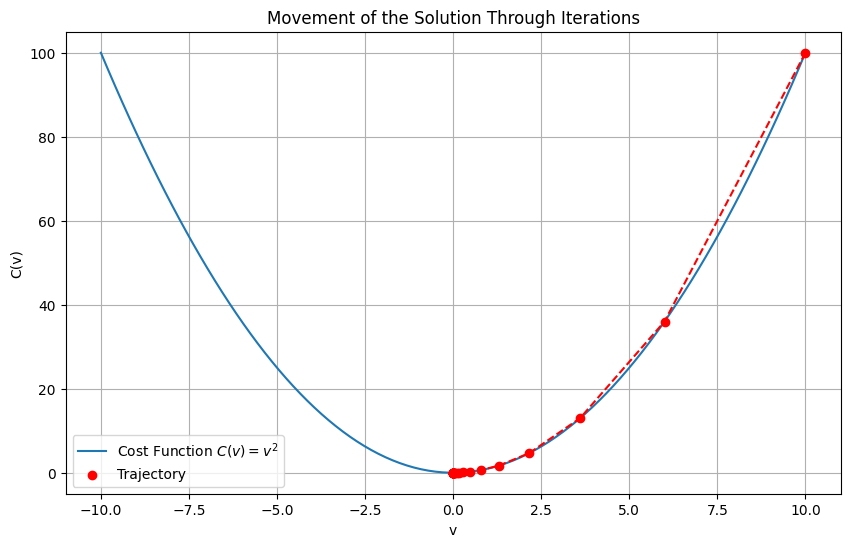

In [ ]:
import numpy as np

def gradient_descent(gradient, start, learn_rate, n_iter=50, tolerance=1e-06):
    vector = start
    trajectory = [vector]
    for _ in range(n_iter):
        diff = -learn_rate * gradient(vector)
        if np.all(np.abs(diff) <= tolerance):
            break
        vector += diff
        trajectory.append(vector)
    return vector, trajectory

def gradient(v):
    return 2 * v

start = 10.0

learn_rate = 0.2

minimum, trajectory = gradient_descent(gradient, start, learn_rate)

v_values = np.linspace(-10, 10, 100)
C_values = v_values**2

plt.figure(figsize=(10, 6))
plt.plot(v_values, C_values, label='Cost Function $C(v) = v^2$')
plt.scatter(trajectory, [t**2 for t in trajectory], color='red', label='Trajectory', zorder=5)
plt.plot(trajectory, [t**2 for t in trajectory], color='red', linestyle='--')
plt.title('Movement of the Solution Through Iterations')
plt.xlabel('v')
plt.ylabel('C(v)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import json
import ipywidgets as widgets
from IPython.display import display, clear_output

# Загрузка данных теста из JSON файла
with open('Adagrad1.json', 'r') as f:
    data = json.load(f)

def create_test(questions):
    for i, question in enumerate(questions):
        print(f"Question {i+1}. {question['question']}\n")

        # Создание кнопок для вариантов ответов
        for key, option in question['options'].items():
            button = widgets.Button(
                description=option,
                layout=widgets.Layout(width='100%', height='auto', overflow='hidden')
            )
            button.style.button_color = 'lightgray'
            button.on_click(lambda b, ans=key, q=question: on_button_click(b, ans, q['answer']))
            display(button)

        print("\n")

def on_button_click(button, chosen_answer, correct_answer):
    if chosen_answer == correct_answer:
        button.style.button_color = 'lightgreen'
        print("Correct!")
    else:
        button.style.button_color = 'red'
        print("Incorrect!")

# Вызов функции для создания теста
create_test(data['questions'])


Question 1. What does Adagrad do differently for each parameter in terms of learning rates?



Button(description='It uses the same learning rate for all parameters', layout=Layout(height='auto', overflow=…

Button(description='It increases the learning rate for frequently occurring features', layout=Layout(height='a…

Button(description='It performs smaller updates for parameters associated with infrequently occurring features…

Button(description='It adapts the learning rate to the parameters, performing smaller updates for frequently o…



Correct!


In [ ]:
import json
import ipywidgets as widgets
from IPython.display import display, clear_output

# Загрузка данных теста из JSON файла
with open('Adagrad2.json', 'r') as f:
    data = json.load(f)

def create_test(questions):
    for i, question in enumerate(questions):
        print(f"Question {i+1}. {question['question']}\n")

        # Создание кнопок для вариантов ответов
        for key, option in question['options'].items():
            button = widgets.Button(
                description=option,
                layout=widgets.Layout(width='100%', height='auto', overflow='hidden')
            )
            button.style.button_color = 'lightgray'
            button.on_click(lambda b, ans=key, q=question: on_button_click(b, ans, q['answer']))
            display(button)

        print("\n")

def on_button_click(button, chosen_answer, correct_answer):
    if chosen_answer == correct_answer:
        button.style.button_color = 'lightgreen'
        print("Correct!")
    else:
        button.style.button_color = 'red'
        print("Incorrect!")

# Вызов функции для создания теста
create_test(data['questions'])


Question 1. How does Adagrad's update rule modify the general learning rate at each time step for every parameter?



Button(description='By multiplying it with the gradient at that time step', layout=Layout(height='auto', overf…

Button(description='By dividing it by the sum of the squares of the gradients up to that time step', layout=La…

Button(description='By adding a smoothing term that avoids division by zero', layout=Layout(height='auto', ove…

Button(description='By dividing it by the square root of the sum of the squares of the gradients plus a smooth…



Correct!


In [ ]:
import json
import ipywidgets as widgets
from IPython.display import display, clear_output

# Загрузка данных теста из JSON файла
with open('Adagrad3.json', 'r') as f:
    data = json.load(f)

def create_test(questions):
    for i, question in enumerate(questions):
        print(f"Question {i+1}. {question['question']}\n")

        # Создание кнопок для вариантов ответов
        for key, option in question['options'].items():
            button = widgets.Button(
                description=option,
                layout=widgets.Layout(width='100%', height='auto', overflow='hidden')
            )
            button.style.button_color = 'lightgray'
            button.on_click(lambda b, ans=key, q=question: on_button_click(b, ans, q['answer']))
            display(button)

        print("\n")

def on_button_click(button, chosen_answer, correct_answer):
    if chosen_answer == correct_answer:
        button.style.button_color = 'lightgreen'
        print("Correct!")
    else:
        button.style.button_color = 'red'
        print("Incorrect!")

# Вызов функции для создания теста
create_test(data['questions'])


Question 1. What is the main weakness of Adagrad according to the text?



Button(description='It does not adapt the learning rate to the parameters', layout=Layout(height='auto', overf…

Button(description='Its accumulated sum of squared gradients causes the learning rate to shrink over time', la…

Button(description='It requires a large smoothing term to avoid division by zero', layout=Layout(height='auto'…

Button(description='It performs much worse without the square root operation', layout=Layout(height='auto', ov…



Correct!


## Adam (Adaptive Moment Estimation)

---


Theory:
Adam combines the principles of Momentum and RMSprop, two well-known algorithms. First-order (average of gradients) and second-order (average of squared gradients) moving averages are used in Adam. With this torque system, Adam can adjust the learning rate for each model parameter, making him more efficient at handling differences between parameters. This is especially useful when working with data with large variations in gradients. The Adam algorithm also has a bias correction mechanism that helps smooth out the moment estimates during the initial stages of training. This ensures a more reliable and sustainable start to learning. Adam's main advantage is that it can efficiently determine the ideal model weights while minimizing the loss function as much as possible. It is widely recognized for its high efficiency and versatility, which allows it to successfully perform a wide variety of deep learning tasks. However, Adam, like any other algorithm, has its drawbacks and may not be the ideal choice for a particular problem. In some situations, other algorithms such as SGD or RMSprop may perform better. In addition to storing an exponentially decaying average of past squared gradients $v_t$ like Adadelta and RMSprop, Adam also keeps an exponentially decaying average of past gradients $m_t$ similar to momentum. Whereas momentum can be seen as a ball running down a slope, Adam behaves like a heavy ball with friction, which thus prefers flat minima in the error surface. We compute the decaying averages of past and past squared gradients $m_t$ and $v_t$ respectively as follows:

$$m_t=\beta_1 m_{t−1}+(1−\beta_1)g_t
\\
v_t=\beta_2 v_{t−1}+(1−\beta_2)g^2_t$$

$m_t$ and $v_t$ are estimates of the first moment (the mean) and the second moment (the uncentered variance) of the gradients respectively, hence the name of the method. As $m_t$ and $v_t$ are initialized as vectors of 0's, the authors of Adam observe that they are biased towards zero, especially during the initial time steps, and especially when the decay rates are small (i.e. $β_1$ and $β_2$ are close to 1). They counteract these biases by computing bias-corrected first and second moment estimates:

$$\hat m_t=\frac{m_t}{1-\beta^t_1}
\\
\hat v_t=\frac{v_t}{1-\beta^t_2}
$$

They then use these to update the parameters just as we have seen in Adadelta and RMSprop, which yields the Adam update rule:

$$\theta_{t+1}=\theta-\frac{\eta}{\sqrt{\hat v_t}+\epsilon}\hat m_t$$ .

## Nadam
---



Nadam (Nesterov-accelerated Adaptive Moment Estimation) is one of the deep learning optimization algorithms that is a combination of the concepts contained in Adam and Nesterov's method. The main goal of Nadam is to improve Adam by using Nesterov momentum, which predicts future gradients and allows for more precise steps to be taken to minimize the loss function. Nadam and Adam use estimates of the first moment, which is the average of all previous gradients, and the second moment, which is the mean square of all previous gradients. However, the main difference is how Nadam adjusts the weight update steps using the position of the parameters in the future, which increases efficiency and convergence speed. This integration of Nesterov momentum helps avoid problems with excessive fluctuations and poor convergence that can occur with the conventional momentum method. Nadam provides a smoother, more stable ride, reducing wastage. Nadam is often used in problems where fast convergence and high accuracy are required, especially when standard Adam may not perform correctly. Working on large amounts of data, it is well suited for complex deep neural network architectures. However, Nadam, like any other optimization algorithm, has its drawbacks and may not be suitable for a particular problem. It is important to experimentally select the optimal optimizer, taking into account the specifics of the problem.



Nadam (Accelerated Adaptive Nesterov Moment Estimation) is combined with elements of two other popular optimization algorithms: Adam and Nesterov Accelerated Gradient (NAG). The basic formula of Nadam is as follows:

1. Updating moments:
- First moment (average of gradients), similar to Adam:

$$m_t = \beta_1 \cdot m_{t-1} + (1 - \beta_1) \cdot g_t$$

- Second moment (mean square of gradients), same as in Adam:

$$v_t = \beta_2 \cdot v_{t-1} + (1 - \beta_2) \cdot g_t^2$$

Where $m_t$ and $v_t$ are the first and second moments, respectively, $\beta_1$ and $\beta_2$ are the forgetting coefficients for these moments, $g_t$ is the gradient at step t.

2. Offset correction:
- As in Adam, for the first and second moments:

$$\hat{m}_t = \frac{m_t}{1 - \beta_1^t}
\\
\hat{v}_t = \frac{v_t}{1 - \beta_2^t}$$

3. Nesterov Momentum integration:
- Unlike Adam, Nadam includes the Nesterov step:

$$\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \left( \beta_1 \cdot \hat{m}_t + \frac{(1 - \beta_1) \cdot g_t}{1 - \beta_1^t} \right)$$

Where $\theta_{t+1}$ is the updated model parameters, $\eta$ is the learning rate, $\epsilon$ is a small constant added for stability (avoiding division by zero).

Optimizer: Adam, Loss: 0.0928, Accuracy: 0.9727
Optimizer: AdamW, Loss: 0.0877, Accuracy: 0.9735
Optimizer: Nadam, Loss: 0.0793, Accuracy: 0.9759


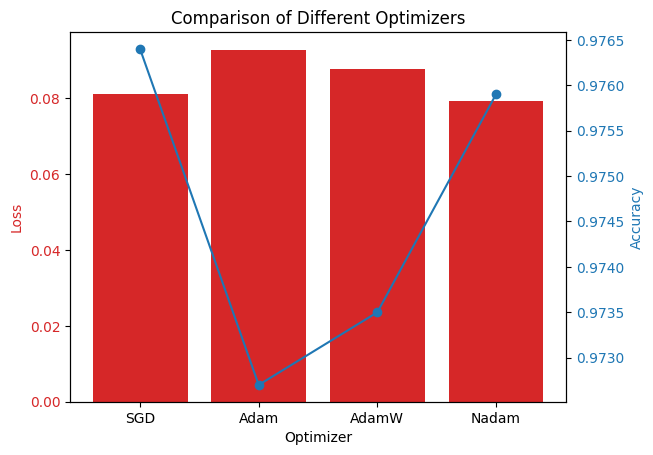

In [ ]:
for opt in [Adam(), tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=0.01), Nadam()]:
    loss, accuracy = train_evaluate(opt)
    results[opt.__class__.__name__] = (loss, accuracy)
    print(f'Optimizer: {opt.__class__.__name__}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

optimizers = list(results.keys())
losses = [results[opt][0] for opt in optimizers]
accuracies = [results[opt][1] for opt in optimizers]

plot_results(results)

This chart illustrates the performance results of a machine learning model trained with various optimizers. It showcases two important metrics – loss and accuracy – for each optimizer. The red bar graph represents the loss metric for each optimizer, plotted on the left vertical axis. A lower value indicates better performance, meaning the model's predictions are closer to the true labels on average. On the other hand, the blue line depicts the accuracy metric, plotted on the right vertical axis. A higher accuracy value indicates superior performance, with a larger proportion of the model's predictions being correct. The three optimizers evaluated are Adam, Adadelta, and Nadam. The annotations above the graph indicate that both Adam and Nadam achieve comparably high accuracy, with a slight edge for Adam.

In [ ]:
import json
import ipywidgets as widgets
from IPython.display import display, clear_output

# Загрузка данных теста из JSON файла
with open('Adam1.json', 'r') as f:
    data = json.load(f)

def create_test(questions):
    for i, question in enumerate(questions):
        print(f"Question {i+1}. {question['question']}\n")

        # Создание кнопок для вариантов ответов
        for key, option in question['options'].items():
            button = widgets.Button(
                description=option,
                layout=widgets.Layout(width='100%', height='auto', overflow='hidden')
            )
            button.style.button_color = 'lightgray'
            button.on_click(lambda b, ans=key, q=question: on_button_click(b, ans, q['answer']))
            display(button)

        print("\n")

def on_button_click(button, chosen_answer, correct_answer):
    if chosen_answer == correct_answer:
        button.style.button_color = 'lightgreen'
        print("Correct!")
    else:
        button.style.button_color = 'red'
        print("Incorrect!")

# Вызов функции для создания теста
create_test(data['questions'])


Question 1. What two well-known algorithms does Adam combine?



Button(description='SGD and Bias Correction', layout=Layout(height='auto', overflow='hidden', width='100%'), s…

Button(description='Momentum and RMSprop', layout=Layout(height='auto', overflow='hidden', width='100%'), styl…

Button(description='First-order and Second-order Averages', layout=Layout(height='auto', overflow='hidden', wi…

Button(description='Bias Correction and Momentum', layout=Layout(height='auto', overflow='hidden', width='100%…



Incorrect!
Correct!
Incorrect!
Incorrect!


In [ ]:
import json
import ipywidgets as widgets
from IPython.display import display, clear_output

# Загрузка данных теста из JSON файла
with open('Adam2.json', 'r') as f:
    data = json.load(f)

def create_test(questions):
    for i, question in enumerate(questions):
        print(f"Question {i+1}. {question['question']}\n")

        # Создание кнопок для вариантов ответов
        for key, option in question['options'].items():
            button = widgets.Button(
                description=option,
                layout=widgets.Layout(width='100%', height='auto', overflow='hidden')
            )
            button.style.button_color = 'lightgray'
            button.on_click(lambda b, ans=key, q=question: on_button_click(b, ans, q['answer']))
            display(button)

        print("\n")

def on_button_click(button, chosen_answer, correct_answer):
    if chosen_answer == correct_answer:
        button.style.button_color = 'lightgreen'
        print("Correct!")
    else:
        button.style.button_color = 'red'
        print("Incorrect!")

# Вызов функции для создания теста
create_test(data['questions'])


Question 1. What does the bias correction mechanism in Adam help with?



Button(description='Adjusting the learning rate for each parameter', layout=Layout(height='auto', overflow='hi…

Button(description='Handling differences between parameters', layout=Layout(height='auto', overflow='hidden', …

Button(description='Smoothing out the moment estimates during initial training stages', layout=Layout(height='…

Button(description='Minimizing the loss function', layout=Layout(height='auto', overflow='hidden', width='100%…



Correct!


In [ ]:
import json
import ipywidgets as widgets
from IPython.display import display, clear_output

# Загрузка данных теста из JSON файла
with open('Adam3.json', 'r') as f:
    data = json.load(f)

def create_test(questions):
    for i, question in enumerate(questions):
        print(f"Question {i+1}. {question['question']}\n")

        # Создание кнопок для вариантов ответов
        for key, option in question['options'].items():
            button = widgets.Button(
                description=option,
                layout=widgets.Layout(width='100%', height='auto', overflow='hidden')
            )
            button.style.button_color = 'lightgray'
            button.on_click(lambda b, ans=key, q=question: on_button_click(b, ans, q['answer']))
            display(button)

        print("\n")

def on_button_click(button, chosen_answer, correct_answer):
    if chosen_answer == correct_answer:
        button.style.button_color = 'lightgreen'
        print("Correct!")
    else:
        button.style.button_color = 'red'
        print("Incorrect!")

# Вызов функции для создания теста
create_test(data['questions'])


Question 1. In which situation might Adam not be the best choice?



Button(description='When working with large variations in gradients', layout=Layout(height='auto', overflow='h…

Button(description='When a high efficiency and versatility is required', layout=Layout(height='auto', overflow…

Button(description='When determining the ideal model weights', layout=Layout(height='auto', overflow='hidden',…

Button(description='When other algorithms like SGD or RMSprop may perform better', layout=Layout(height='auto'…



Correct!


In [ ]:
import json
import ipywidgets as widgets
from IPython.display import display, clear_output

# Загрузка данных теста из JSON файла
with open('Nadam1.json', 'r') as f:
    data = json.load(f)

def create_test(questions):
    for i, question in enumerate(questions):
        print(f"Question {i+1}. {question['question']}\n")

        # Создание кнопок для вариантов ответов
        for key, option in question['options'].items():
            button = widgets.Button(
                description=option,
                layout=widgets.Layout(width='100%', height='auto', overflow='hidden')
            )
            button.style.button_color = 'lightgray'
            button.on_click(lambda b, ans=key, q=question: on_button_click(b, ans, q['answer']))
            display(button)

        print("\n")

def on_button_click(button, chosen_answer, correct_answer):
    if chosen_answer == correct_answer:
        button.style.button_color = 'lightgreen'
        print("Correct!")
    else:
        button.style.button_color = 'red'
        print("Incorrect!")

# Вызов функции для создания теста
create_test(data['questions'])


Question 1. What is the main goal of Nadam?



Button(description='To increase the learning rate', layout=Layout(height='auto', overflow='hidden', width='100…

Button(description='To reduce the amount of data needed', layout=Layout(height='auto', overflow='hidden', widt…

Button(description='To improve Adam by using Nesterov momentum', layout=Layout(height='auto', overflow='hidden…

Button(description='To simplify the optimization process', layout=Layout(height='auto', overflow='hidden', wid…



Correct!


In [ ]:
import json
import ipywidgets as widgets
from IPython.display import display, clear_output

# Загрузка данных теста из JSON файла
with open('Nadam2.json', 'r') as f:
    data = json.load(f)

def create_test(questions):
    for i, question in enumerate(questions):
        print(f"Question {i+1}. {question['question']}\n")

        # Создание кнопок для вариантов ответов
        for key, option in question['options'].items():
            button = widgets.Button(
                description=option,
                layout=widgets.Layout(width='100%', height='auto', overflow='hidden')
            )
            button.style.button_color = 'lightgray'
            button.on_click(lambda b, ans=key, q=question: on_button_click(b, ans, q['answer']))
            display(button)

        print("\n")

def on_button_click(button, chosen_answer, correct_answer):
    if chosen_answer == correct_answer:
        button.style.button_color = 'lightgreen'
        print("Correct!")
    else:
        button.style.button_color = 'red'
        print("Incorrect!")

# Вызов функции для создания теста
create_test(data['questions'])


Question 1. What does Nadam use to adjust the weight update steps?



Button(description='The average of all previous gradients', layout=Layout(height='auto', overflow='hidden', wi…

Button(description='The position of the parameters in the future', layout=Layout(height='auto', overflow='hidd…

Button(description='The mean square of all previous gradients', layout=Layout(height='auto', overflow='hidden'…

Button(description='The current learning rate', layout=Layout(height='auto', overflow='hidden', width='100%'),…



Correct!


In [ ]:
import json
import ipywidgets as widgets
from IPython.display import display, clear_output

# Загрузка данных теста из JSON файла
with open('Nadam3.json', 'r') as f:
    data = json.load(f)

def create_test(questions):
    for i, question in enumerate(questions):
        print(f"Question {i+1}. {question['question']}\n")

        # Создание кнопок для вариантов ответов
        for key, option in question['options'].items():
            button = widgets.Button(
                description=option,
                layout=widgets.Layout(width='100%', height='auto', overflow='hidden')
            )
            button.style.button_color = 'lightgray'
            button.on_click(lambda b, ans=key, q=question: on_button_click(b, ans, q['answer']))
            display(button)

        print("\n")

def on_button_click(button, chosen_answer, correct_answer):
    if chosen_answer == correct_answer:
        button.style.button_color = 'lightgreen'
        print("Correct!")
    else:
        button.style.button_color = 'red'
        print("Incorrect!")

# Вызов функции для создания теста
create_test(data['questions'])


Question 1. In which situations is Nadam often used?



Button(description='When large amounts of data and complex deep neural network architectures are involved', la…

Button(description='When a simple neural network architecture is used', layout=Layout(height='auto', overflow=…

Button(description='When minimal data processing is required', layout=Layout(height='auto', overflow='hidden',…

Button(description='When the conventional momentum method is preferred', layout=Layout(height='auto', overflow…



Correct!


## RMSprop Root Mean Square Propagation
---


Theory:
Adagrad algorithm slows down learning for frequently occurring parameters. Root Mean Square Propagation intended to rectify this shortcoming.
The goal of RMSprop is to normalize the learning rate by dividing the learning rate for weight by the average of the magnitudes of recent gradients for that weight. This adaptive learning rate helps prevent the learning rates from growing too large or becoming too small. An essential property of RMSprop is that you are not constrained solely by the sum of past gradients, but rather limited by the gradients of recent time steps.

The main idea of RMSprop is to adaptively adjust the learning rate for each parameter. Here is the basic formula for RMSprop:

1. Updated moving mean squares of gradients:

$$v_t = \beta \cdot v_{t-1} + (1 - \beta) \cdot g_t^2$$

Where $v_t$ is the moving mean squares of the gradients at step t, $\beta$ is the forgetting coefficient (often close to 0.9), $g_t$ is the gradient at step t.

2. Updating scales:

$$\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{v_t + \epsilon}} \cdot g_t$$

Where $\theta_{t+1}$ is the updated parameters, $\theta_t$ is the current parameters, $\eta$ is the learning rate, $\epsilon$ is a small constant to prevent division by zero.

## AdamW
---


Theory:
AdamW is a modification of the regular Adam optimization algorithm. It was designed to address some of the shortcomings of the original Adam, in particular regarding the handling of weight regularization. The main difference between AdamW and Adam is how it uses weight regularization, also known as weight loss. Although Adam adds weight regularization directly to gradients, AdamW uses regularization separately from the gradient updating process. This separation improves the generalization ability of the model and allows for more efficient control of weight scaling. This is especially important for tasks where overfitting is a big problem. AdamW applies weight regularization directly to model parameters rather than to gradients. This helps avoid excessive weight reduction caused by over-regularization. AdamW uses estimates of the first and second moments of gradients to adaptively scale the learning rate, just like the original Adam, but it handles the regularization more efficiently. This makes AdamW ideal for tasks where large amounts of data need to be taken into account to avoid model overtraining. Consequently, AdamW offers a more balanced approach to optimization, addressing some of Adam's weaknesses and providing improved stability and performance on a variety of deep learning tasks. However, AdamW, like any other optimization algorithm, may require careful tuning of hyperparameters depending on the problem.

AdamW is a modification of the Adam optimization algorithm that includes weight regularization (weight decay). The main difference between AdamW and Adam is how it handles weight regularization. Here are the basic formulas for AdamW:

1. Updating moments (same as Adam):
- First moment (average of gradients):

$$m_t = \beta_1 \cdot m_{t-1} + (1 - \beta_1) \cdot g_t$$

- Second moment (mean square of gradients):

$$v_t = \beta_2 \cdot v_{t-1} + (1 - \beta_2) \cdot g_t^2$$

2. Offset correction:
- For the first and second moments:

$$\hat{m}_t = \frac{m_t}{1 - \beta_1^t}
\\
\hat{v}_t = \frac{v_t}{1 - \beta_2^t}$$

3. Updating weights taking into account regularization:

$$\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \cdot \hat{m}_t - \eta \cdot \lambda \cdot \theta_t$$

Where $\theta_{t+1}$ are the updated model parameters, $\eta$ is the learning rate, $\lambda$ is the weight decay coefficient, $\epsilon$ is a small constant for stability.

Optimizer: RMSprop, Loss: 0.0816, Accuracy: 0.9758
Optimizer: Adagrad, Loss: 0.3881, Accuracy: 0.8993


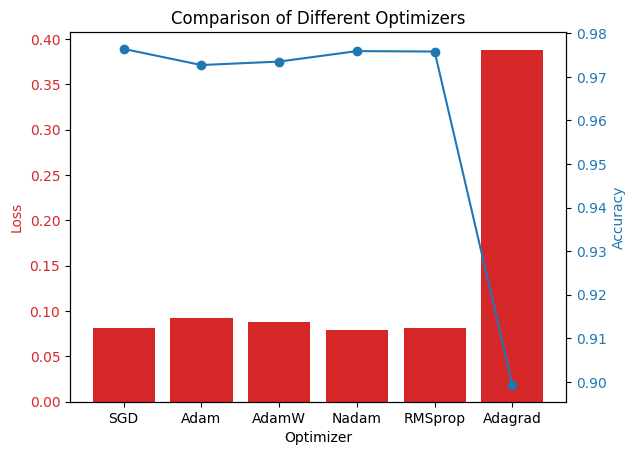

In [ ]:
for opt in [tf.keras.optimizers.RMSprop(), tf.keras.optimizers.Adagrad()]:
    loss, accuracy = train_evaluate(opt)
    results[opt.__class__.__name__] = (loss, accuracy)
    print(f'Optimizer: {opt.__class__.__name__}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

plot_results(results)

In [ ]:
import json
import ipywidgets as widgets
from IPython.display import display, clear_output

# Загрузка данных теста из JSON файла
with open('RMSprop1.json', 'r') as f:
    data = json.load(f)

def create_test(questions):
    for i, question in enumerate(questions):
        print(f"Question {i+1}. {question['question']}\n")

        # Создание кнопок для вариантов ответов
        for key, option in question['options'].items():
            button = widgets.Button(
                description=option,
                layout=widgets.Layout(width='100%', height='auto', overflow='hidden')
            )
            button.style.button_color = 'lightgray'
            button.on_click(lambda b, ans=key, q=question: on_button_click(b, ans, q['answer']))
            display(button)

        print("\n")

def on_button_click(button, chosen_answer, correct_answer):
    if chosen_answer == correct_answer:
        button.style.button_color = 'lightgreen'
        print("Correct!")
    else:
        button.style.button_color = 'red'
        print("Incorrect!")

# Вызов функции для создания теста
create_test(data['questions'])


Question 1. How does RMSprop adjust the learning rate for each weight parameter?



Button(description='By dividing the learning rate by the sum of past gradients for that weight', layout=Layout…

Button(description='By multiplying the learning rate by the average of recent gradients for that weight', layo…

Button(description='By dividing the learning rate by the average of recent gradients for that weight', layout=…

Button(description='By adding the learning rate to the average of recent gradients for that weight', layout=La…



Correct!


In [ ]:
import json
import ipywidgets as widgets
from IPython.display import display, clear_output

# Загрузка данных теста из JSON файла
with open('RMSprop2.json', 'r') as f:
    data = json.load(f)

def create_test(questions):
    for i, question in enumerate(questions):
        print(f"Question {i+1}. {question['question']}\n")

        # Создание кнопок для вариантов ответов
        for key, option in question['options'].items():
            button = widgets.Button(
                description=option,
                layout=widgets.Layout(width='100%', height='auto', overflow='hidden')
            )
            button.style.button_color = 'lightgray'
            button.on_click(lambda b, ans=key, q=question: on_button_click(b, ans, q['answer']))
            display(button)

        print("\n")

def on_button_click(button, chosen_answer, correct_answer):
    if chosen_answer == correct_answer:
        button.style.button_color = 'lightgreen'
        print("Correct!")
    else:
        button.style.button_color = 'red'
        print("Incorrect!")

# Вызов функции для создания теста
create_test(data['questions'])


Question 1. Which algorithm does RMSprop intend to improve upon by addressing the issue of slowed down learning for frequently occurring parameters?



Button(description='Gradient Descent', layout=Layout(height='auto', overflow='hidden', width='100%'), style=Bu…

Button(description='Adadelta', layout=Layout(height='auto', overflow='hidden', width='100%'), style=ButtonStyl…

Button(description='Adagrad', layout=Layout(height='auto', overflow='hidden', width='100%'), style=ButtonStyle…

Button(description='Momentum', layout=Layout(height='auto', overflow='hidden', width='100%'), style=ButtonStyl…



Correct!


In [ ]:
import json
import ipywidgets as widgets
from IPython.display import display, clear_output

# Загрузка данных теста из JSON файла
with open('RMSprop3.json', 'r') as f:
    data = json.load(f)

def create_test(questions):
    for i, question in enumerate(questions):
        print(f"Question {i+1}. {question['question']}\n")

        # Создание кнопок для вариантов ответов
        for key, option in question['options'].items():
            button = widgets.Button(
                description=option,
                layout=widgets.Layout(width='100%', height='auto', overflow='hidden')
            )
            button.style.button_color = 'lightgray'
            button.on_click(lambda b, ans=key, q=question: on_button_click(b, ans, q['answer']))
            display(button)

        print("\n")

def on_button_click(button, chosen_answer, correct_answer):
    if chosen_answer == correct_answer:
        button.style.button_color = 'lightgreen'
        print("Correct!")
    else:
        button.style.button_color = 'red'
        print("Incorrect!")

# Вызов функции для создания теста
create_test(data['questions'])


Question 1. In RMSprop, which factor influences the limitation of learning rates for individual parameters?



Button(description='Gradients of recent time steps', layout=Layout(height='auto', overflow='hidden', width='10…

Button(description='Sum of past gradients', layout=Layout(height='auto', overflow='hidden', width='100%'), sty…

Button(description='Number of epochs', layout=Layout(height='auto', overflow='hidden', width='100%'), style=Bu…

Button(description='Magnitude of weight updates', layout=Layout(height='auto', overflow='hidden', width='100%'…



Correct!


In [ ]:
import json
import ipywidgets as widgets
from IPython.display import display, clear_output

# Загрузка данных теста из JSON файла
with open('AdamW1.json', 'r') as f:
    data = json.load(f)

def create_test(questions):
    for i, question in enumerate(questions):
        print(f"Question {i+1}. {question['question']}\n")

        # Создание кнопок для вариантов ответов
        for key, option in question['options'].items():
            button = widgets.Button(
                description=option,
                layout=widgets.Layout(width='100%', height='auto', overflow='hidden')
            )
            button.style.button_color = 'lightgray'
            button.on_click(lambda b, ans=key, q=question: on_button_click(b, ans, q['answer']))
            display(button)

        print("\n")

def on_button_click(button, chosen_answer, correct_answer):
    if chosen_answer == correct_answer:
        button.style.button_color = 'lightgreen'
        print("Correct!")
    else:
        button.style.button_color = 'red'
        print("Incorrect!")

# Вызов функции для создания теста
create_test(data['questions'])


Question 1. What is the main difference between AdamW and the regular Adam algorithm?



Button(description='AdamW applies weight regularization separately from the gradient updating process', layout…

Button(description='AdamW uses a different method for estimating the first and second moments of gradients', l…

Button(description='AdamW has a different way of handling learning rate', layout=Layout(height='auto', overflo…

Button(description='AdamW uses a completely different approach to optimize model parameters', layout=Layout(he…



Correct!


In [ ]:
import json
import ipywidgets as widgets
from IPython.display import display, clear_output

# Загрузка данных теста из JSON файла
with open('AdamW2.json', 'r') as f:
    data = json.load(f)

def create_test(questions):
    for i, question in enumerate(questions):
        print(f"Question {i+1}. {question['question']}\n")

        # Создание кнопок для вариантов ответов
        for key, option in question['options'].items():
            button = widgets.Button(
                description=option,
                layout=widgets.Layout(width='100%', height='auto', overflow='hidden')
            )
            button.style.button_color = 'lightgray'
            button.on_click(lambda b, ans=key, q=question: on_button_click(b, ans, q['answer']))
            display(button)

        print("\n")

def on_button_click(button, chosen_answer, correct_answer):
    if chosen_answer == correct_answer:
        button.style.button_color = 'lightgreen'
        print("Correct!")
    else:
        button.style.button_color = 'red'
        print("Incorrect!")

# Вызов функции для создания теста
create_test(data['questions'])


Question 1. Why is AdamW particularly important for tasks prone to overfitting?



Button(description='It reduces the learning rate more efficiently', layout=Layout(height='auto', overflow='hid…

Button(description='It applies weight regularization directly to model parameters rather than to gradients', l…

Button(description='It changes the way gradients are calculated', layout=Layout(height='auto', overflow='hidde…

Button(description='It uses a different first and second moment estimation technique', layout=Layout(height='a…



Correct!


In [ ]:
import json
import ipywidgets as widgets
from IPython.display import display, clear_output

# Загрузка данных теста из JSON файла
with open('AdamW3.json', 'r') as f:
    data = json.load(f)

def create_test(questions):
    for i, question in enumerate(questions):
        print(f"Question {i+1}. {question['question']}\n")

        # Создание кнопок для вариантов ответов
        for key, option in question['options'].items():
            button = widgets.Button(
                description=option,
                layout=widgets.Layout(width='100%', height='auto', overflow='hidden')
            )
            button.style.button_color = 'lightgray'
            button.on_click(lambda b, ans=key, q=question: on_button_click(b, ans, q['answer']))
            display(button)

        print("\n")

def on_button_click(button, chosen_answer, correct_answer):
    if chosen_answer == correct_answer:
        button.style.button_color = 'lightgreen'
        print("Correct!")
    else:
        button.style.button_color = 'red'
        print("Incorrect!")

# Вызов функции для создания теста
create_test(data['questions'])


Question 1. What does AdamW improve compared to the original Adam?



Button(description='The process of calculating gradients', layout=Layout(height='auto', overflow='hidden', wid…

Button(description='The efficiency of the first and second moment estimates', layout=Layout(height='auto', ove…

Button(description='The method of applying the learning rate', layout=Layout(height='auto', overflow='hidden',…

Button(description='Generalization ability of the model and control of weight scaling', layout=Layout(height='…



Correct!


## Basic Optimizers on the MNIST Dataset
---

This section presents visualizations demonstrating the effectiveness of four key optimization algorithms: SGD (Stochastic Gradient Descent), RMSprop, Adam and Nesterov Accelerated Gradient. These optimizers were applied to train a simple neural network on the well-known MNIST dataset, which consists of handwritten digits from 0 to 9. MNIST is a standard dataset in the field of machine learning and deep learning, often used for benchmarking classification algorithms. The graphs presented below display the dynamics of changes in the loss function during the learning process for each of the optimizers.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop, Adam

# Загрузка и предобработка данных MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Функция для создания модели
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Функция для обучения модели
def train_model(optimizer):
    model = create_model()
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=0)
    return history

def plot_and_save_history(history, optimizer_name, file_name):
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Loss over Epochs ({optimizer_name})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(file_name)
    plt.close()

# Обучение модели с различными оптимизаторами и сохранение графиков
for opt_name, opt in [("SGD", SGD()), ("RMSprop", RMSprop()), ("Adam", Adam()), ("Nesterov", SGD(momentum=0.9, nesterov=True))]:
    history = train_model(opt)
    plot_and_save_history(history, opt_name, f"optimizer_{opt_name.lower()}.png")

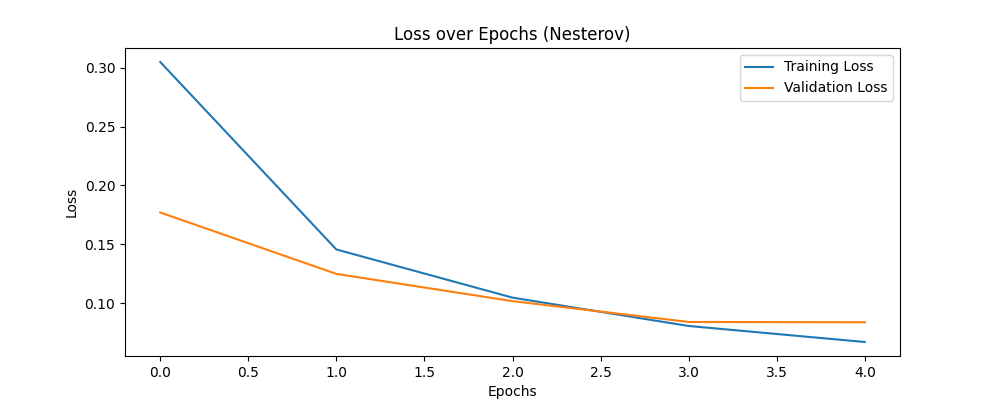

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output, Image

# Функция для отображения изображения графика
def show_graph(optimizer_name):
    file_path = f"optimizer_{optimizer_name.lower()}.png"  # Путь к файлу графика
    display(Image(filename=file_path))

# Функция обработки нажатия кнопки
def on_button_clicked(b):
    clear_output(wait=True)
    display(buttons_box)
    show_graph(b.description)

# Создание кнопок для каждого оптимизатора
button_sgd = widgets.Button(description="SGD")
button_rmsprop = widgets.Button(description="RMSprop")
button_adam = widgets.Button(description="Adam")
button_nesterov = widgets.Button(description="Nesterov")

# Добавление обработчика событий для кнопок
button_sgd.on_click(on_button_clicked)
button_rmsprop.on_click(on_button_clicked)
button_adam.on_click(on_button_clicked)
button_nesterov.on_click(on_button_clicked)

# Отображение кнопок
buttons_box = widgets.HBox([button_sgd, button_rmsprop, button_adam, button_nesterov])
display(buttons_box)


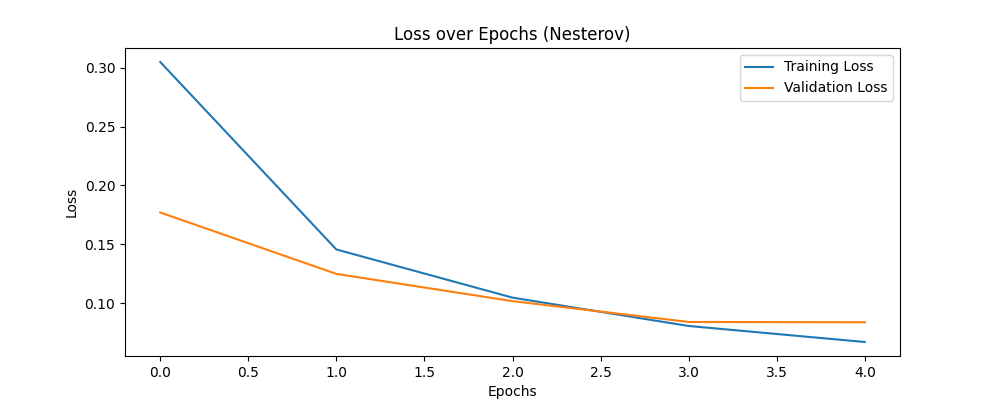

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output, Image

# Функция для отображения изображения графика
def show_graph(optimizer_name):
    file_path = f"optimizer_{optimizer_name}.png"  # Путь к файлу графика
    display(Image(filename=file_path))

# Функция обработки нажатия кнопки
def on_button_clicked(b):
    clear_output(wait=True)
    display(buttons_box)
    show_graph(b.description.lower())

# Создание кнопок для каждого оптимизатора
button_sgd = widgets.Button(description="SGD")
button_rmsprop = widgets.Button(description="RMSprop")
button_adam = widgets.Button(description="Adam")
button_nesterov = widgets.Button(description="Nesterov")

# Добавление обработчика событий для кнопок
button_sgd.on_click(on_button_clicked)
button_rmsprop.on_click(on_button_clicked)
button_adam.on_click(on_button_clicked)
button_nesterov.on_click(on_button_clicked)

# Отображение кнопок
buttons_box = widgets.HBox([button_sgd, button_rmsprop, button_adam, button_nesterov])
display(buttons_box)
